In [1]:
from __future__ import print_function
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path)

import numpy as np
import math
import copy
import pandas as pd
import scipy.stats as ss
import pickle
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Plots

In [2]:
with open("accsPart.pkl", "rb") as f:
    accsLRPart = pickle.load(f)
with open("accsAggr.pkl", "rb") as f:
    accsLRAggr = pickle.load(f)
with open("accsSingle.pkl", "rb") as f:
    accsLRSingle = pickle.load(f)

In [3]:
lrs = [512, 1024, 2048, 4096]

In [4]:
maxAccPartModel = {}
for lr in lrs:
    maxAccPartModel[lr] = []
    accs = accsLRPart[lr][0]
    for j in range(1000):
        maxV = np.max(accs[4*j:4*j+4])
        maxAccPartModel[lr].append(maxV)

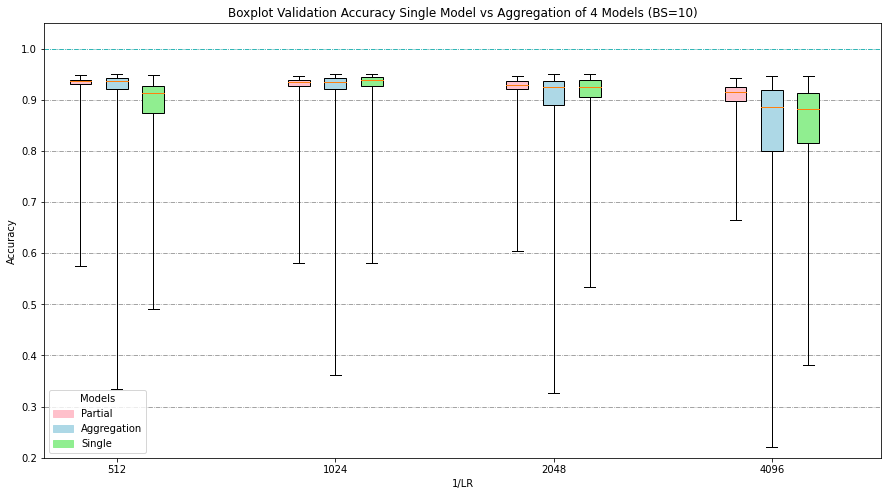

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Boxplot Validation Accuracy Single Model vs Aggregation of 4 Models (BS=10)')

accsPart = [maxAccPartModel[lr] for lr in lrs]
accsAggr = [accsLRAggr[lr][0] for lr in lrs]
accsSingle = [accsLRSingle[lr][0] for lr in lrs]

part_plot = plt.boxplot(accsPart, positions=np.array(np.arange(len(accsPart)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr_plot = plt.boxplot(accsAggr, positions=np.array(np.arange(len(accsAggr)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsAggr)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [6]:
diffLRAggrPart, diffLRSingleAggr, diffLRSinglePart  = {}, {}, {}
for lr in accsLRPart:
    diffLRAggrPart[lr] = np.subtract(accsLRAggr[lr][0], maxAccPartModel[lr])
    diffLRAggrPart[lr] = round(np.mean(diffLRAggrPart[lr]),2)

    diffLRSingleAggr[lr] = np.subtract(accsLRSingle[lr][0], accsLRAggr[lr][0])
    diffLRSingleAggr[lr] = round(np.mean(diffLRSingleAggr[lr]),2)

    diffLRSinglePart[lr] = np.subtract(accsLRSingle[lr][0], maxAccPartModel[lr])
    diffLRSinglePart[lr] = round(np.mean(diffLRSinglePart[lr]),2)

In [7]:
print("Mean difference Aggregated-Partial models:")
print(diffLRAggrPart)
print("Mean difference Single-Aggregated models:")
print(diffLRSingleAggr)
print("Mean difference Single-Partial models:")
print(diffLRSinglePart)

Mean difference Aggregated-Partial models:
{512: -0.02, 1024: -0.01, 2048: -0.03, 4096: -0.06}
Mean difference Single-Aggregated models:
{512: -0.03, 1024: 0.01, 2048: 0.01, 4096: 0.0}
Mean difference Single-Partial models:
{512: -0.05, 1024: -0.0, 2048: -0.02, 4096: -0.06}


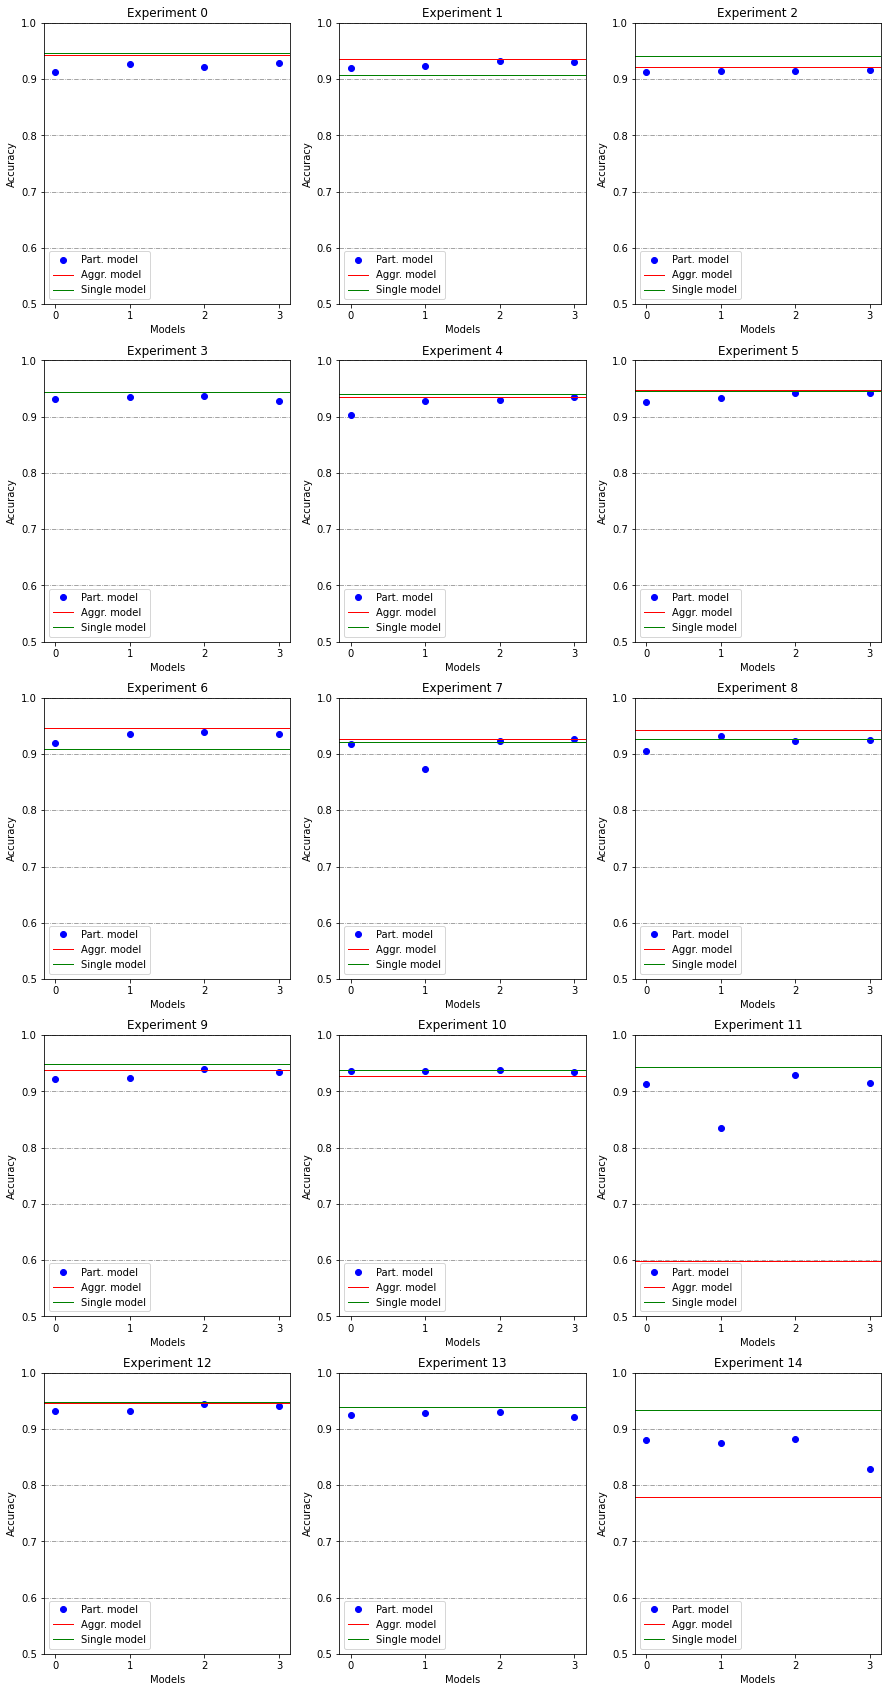

In [8]:
fig = plt.figure(figsize=(15,30))
axs = fig.subplots(5,3)

accsPart = [accsLRPart[1024][0][4*j:4*j+4] for j in range(15)]
accsAggr = accsLRAggr[1024][0][:15]
accsSingle = accsLRSingle[1024][0][:15]

for i in range(5):
    for j in range(3):
        axs[i,j].set_title('Experiment ' + str(3*i+j))
        axs[i,j].plot(accsPart[3*i+j], 'bo', label='Part. model')
        axs[i,j].axhline(y = accsAggr[3*i+j], color = 'r', linewidth = 1, label='Aggr. model')
        axs[i,j].axhline(y = accsSingle[3*i+j], color = 'g', linewidth = 1, label='Single model')

for ax in axs.flat:
    ax.set(xlabel='Models', ylabel='Accuracy')
    ax.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
    ax.set_xticks([0,1,2,3])
    ax.set_ylim([0.5, 1])

    ax.legend(loc=3)

plt.show()

In [ ]:
print("W2:")
print("Frob Norm - Mean - Var")
i = 0
for w2 in weights2:
    print('Model ' + str(i) + ': ' + str(round(np.linalg.norm(w2, 'fro'),2)) + ' - ' + str(round(np.mean(w2),2)) + ' - ' + str(round(np.var(w2),2)))
    i+=1
print("W3:")
print("Frob Norm - Mean - Var")
i = 0
for w3 in weights3:
    print('Model ' + str(i) + ': ' + str(round(np.linalg.norm(w3, 'fro'),2)) + ' - ' + str(round(np.mean(w3),2)) + ' - ' + str(round(np.var(w3),2)))
    i+=1

W2:
Frob Norm - Mean - Var
Model 0: 23290.85 - 1304.83 - 6773417.49
Model 1: 21764.41 - 819.84 - 6729251.94
Model 2: 21879.34 - 502.67 - 7227092.72
Model 3: 20252.67 - 465.98 - 6191773.98
W3:
Frob Norm - Mean - Var
Model 0: 76.3 - 5.08 - 459.24
Model 1: 154.82 - 27.17 - 1259.31
Model 2: 171.88 - 47.17 - 237.31
Model 3: 222.65 - 56.08 - 985.91
